In [ ]:
from google.colab import files
uploaded = files.upload()

Saving taco_sales_(2024-2025).csv to taco_sales_(2024-2025) (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("taco_sales_(2024-2025).csv")

In [ ]:
# 1. Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_df = df[numeric_cols]

desc_stats = numeric_df.describe().T
desc_stats["Q1"] = numeric_df.quantile(0.25)
desc_stats["Q2"] = numeric_df.quantile(0.50)
desc_stats["Q3"] = numeric_df.quantile(0.75)

print(desc_stats)

                          count          mean            std        min  \
Order ID                 1000.0  552504.86500  255948.779709  101139.00   
Delivery Duration (min)  1000.0      50.93000      23.227540      10.00   
Toppings Count           1000.0       2.52900       1.717005       0.00   
Distance (km)            1000.0      13.07342       7.142268       0.51   
Price ($)                1000.0       6.90825       2.310137       3.00   
Tip ($)                  1000.0       1.80611       1.132035       0.01   

                                 25%        50%          75%        max  \
Order ID                 331796.7500  559740.00  771781.7500  999138.00   
Delivery Duration (min)      30.0000      53.00      71.0000      90.00   
Toppings Count                1.0000       3.00       4.0000       5.00   
Distance (km)                 6.9725      13.20      19.2425      24.98   
Price ($)                     4.5000       6.75       9.2500      10.75   
Tip ($)                 

In [ ]:
# 2. Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka.
print(numeric_df.head(10))

   Order ID  Delivery Duration (min)  Toppings Count  Distance (km)  \
0    770487                       41               5           3.01   
1    671858                       14               1           6.20   
2    688508                       38               2          20.33   
3    944962                       45               2           3.00   
4    476417                       15               0          24.34   
5    678856                       83               0          16.70   
6    183667                       45               1           9.57   
7    379946                       31               3           9.80   
8    771088                       17               2          10.33   
9    694731                       73               1           6.99   

   Price ($)  Tip ($)  
0       9.25     2.22  
1       4.25     3.01  
2       7.00     0.02  
3       5.50     1.90  
4       4.50     1.14  
5       3.00     2.32  
6       5.75     0.63  
7       6.75     2.97  
8 

In [ ]:
# 3. Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.
print(f"Jumlah Record     : {df.shape[0]}")
print(f"Jumlah Atribut    : {df.shape[1]}")
print(f"Nama Atribut      : {list(df.columns)}")
print(f"Jumlah Atribut Numerik : {len(numeric_cols)}")

Jumlah Record     : 1000
Jumlah Atribut    : 13
Nama Atribut      : ['Order ID', 'Restaurant Name', 'Location', 'Order Time', 'Delivery Time', 'Delivery Duration (min)', 'Taco Size', 'Taco Type', 'Toppings Count', 'Distance (km)', 'Price ($)', 'Tip ($)', 'Weekend Order']
Jumlah Atribut Numerik : 6


In [ ]:
# 4. Tampilkan jumlah label dari semua attribute yang bernilai object (contoh : Jenis Kelamin, Agama).
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    print(f"{col} -> {df[col].nunique()} label unik")

Restaurant Name -> 10 label unik
Location -> 10 label unik
Order Time -> 1000 label unik
Delivery Time -> 999 label unik
Taco Size -> 2 label unik
Taco Type -> 5 label unik


/tmp/ipython-input-1416826597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_type.values, y=avg_price_by_type.index, palette="viridis")


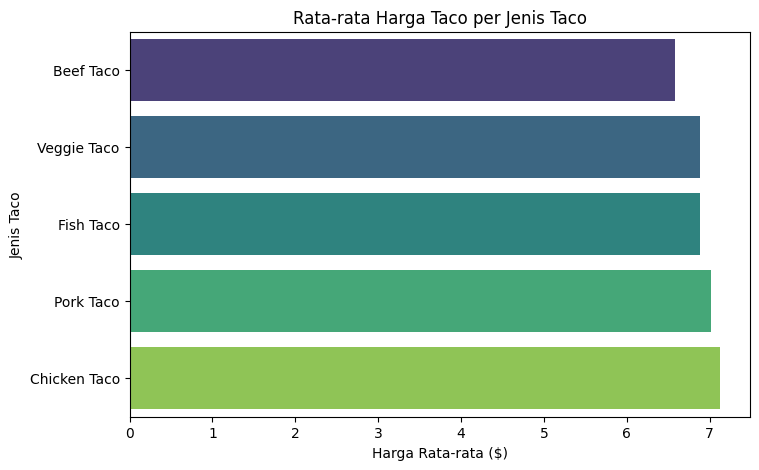

/tmp/ipython-input-1416826597.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Taco Size", y="Price ($)", data=df, palette="Set2")


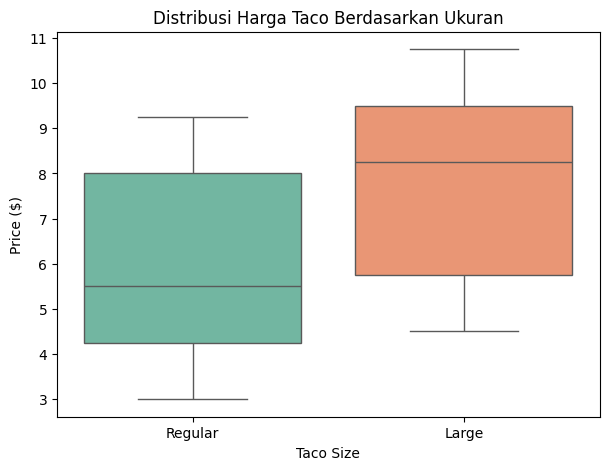

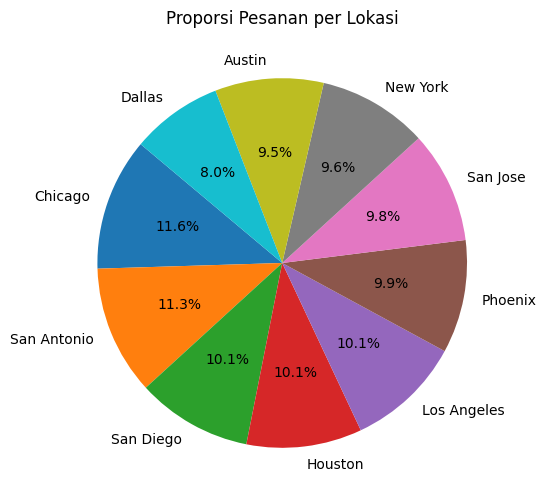

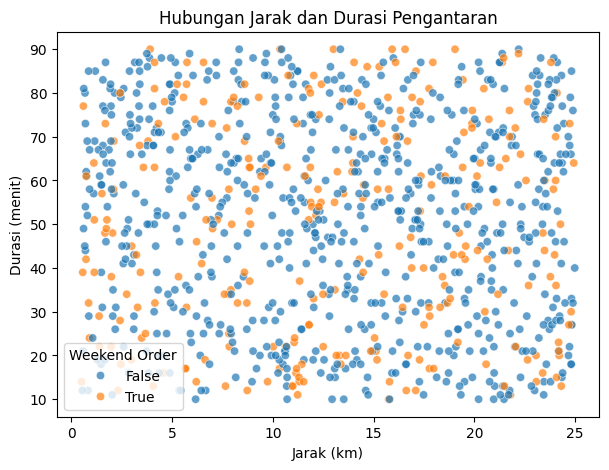

In [ ]:
# 5. Visualisasikan dataset dengan salah satu grafik. Pilih grafik yang paling cocok untuk memvisualisasikan data tersebut.
# a. Grafik Batang: Rata-rata harga taco per jenis taco
plt.figure(figsize=(8,5))
avg_price_by_type = df.groupby("Taco Type")["Price ($)"].mean().sort_values()
sns.barplot(x=avg_price_by_type.values, y=avg_price_by_type.index, palette="viridis")
plt.title("Rata-rata Harga Taco per Jenis Taco")
plt.xlabel("Harga Rata-rata ($)")
plt.ylabel("Jenis Taco")
plt.show()

# b. Boxplot: Perbandingan harga taco berdasarkan ukuran (Regular vs Large)
plt.figure(figsize=(7,5))
sns.boxplot(x="Taco Size", y="Price ($)", data=df, palette="Set2")
plt.title("Distribusi Harga Taco Berdasarkan Ukuran")
plt.show()

# c. Pie Chart: Proporsi pesanan berdasarkan lokasi
plt.figure(figsize=(6,6))
location_counts = df["Location"].value_counts()
plt.pie(location_counts, labels=location_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Proporsi Pesanan per Lokasi")
plt.show()

# d. Scatter Plot: Jarak vs Durasi Pengantaran
plt.figure(figsize=(7,5))
sns.scatterplot(x="Distance (km)", y="Delivery Duration (min)", hue="Weekend Order", data=df, alpha=0.7)
plt.title("Hubungan Jarak dan Durasi Pengantaran")
plt.xlabel("Jarak (km)")
plt.ylabel("Durasi (menit)")
plt.legend(title="Weekend Order")
plt.show()


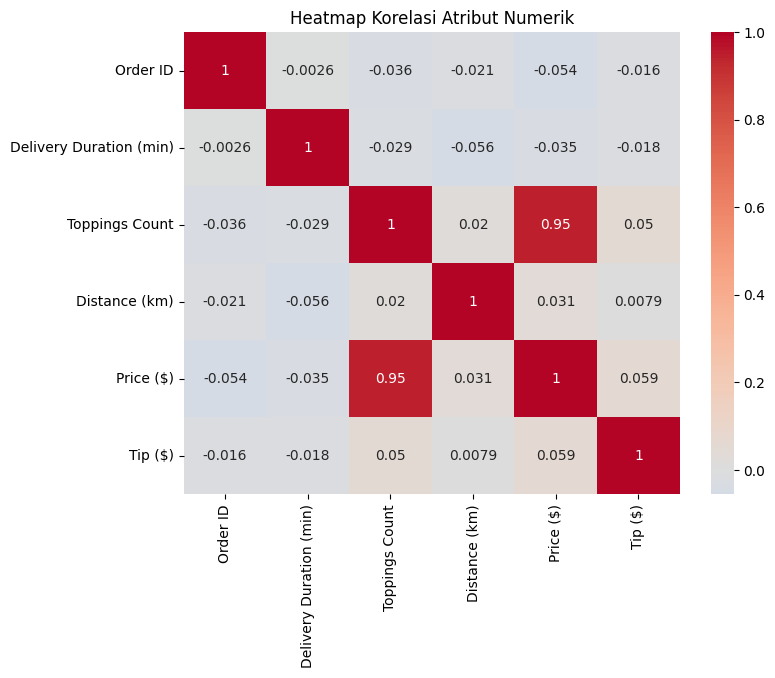

In [ ]:
# 6. Tampilkan korelasi dataset menggunakan heatmap.
plt.figure(figsize=(8,6))
cor_matrix = numeric_df.corr()
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()

## Kesimpulan Analisis Data Taco Sales

1. **Statistik deskriptif** menunjukkan:
   - Rata-rata harga taco sekitar $6.9, dengan harga minimum $3 dan maksimum $10.75.
   - Lama pengantaran rata-rata 50 menit dengan variasi cukup tinggi (std ~23 menit).
   - Jarak rata-rata pengantaran 13 km, dengan maksimum hampir 25 km.

2. **Distribusi harga taco** cenderung berkumpul di rentang $4 – $9, menandakan harga relatif terjangkau dan stabil.

3. **Jumlah kategori (atribut object)** cukup bervariasi, misalnya restoran, lokasi, jenis taco, dll. Ini menunjukkan dataset cukup kaya dalam aspek kategorikal.

4. **Heatmap korelasi** menunjukkan hubungan positif antara harga dan jumlah topping, serta jarak dengan durasi pengantaran (semakin jauh, durasi makin lama).

5. Secara umum, dataset ini cocok untuk menganalisis faktor-faktor yang mempengaruhi **harga**, **tip pelanggan**, dan **durasi pengiriman**.